In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [2]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cuda


In [3]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [4]:
training_epochs = 15
batch_size = 100

In [5]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [6]:
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

In [7]:
linear = nn.Linear(784, 10, bias=True).to(device)

In [8]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [9]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        X = X.view(-1, 28*28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost/total_batch
    
    print('Epoch:', '%04d' % (epoch+1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535468459
Epoch: 0002 cost = 0.359274149
Epoch: 0003 cost = 0.331187516
Epoch: 0004 cost = 0.316578031
Epoch: 0005 cost = 0.307158172
Epoch: 0006 cost = 0.300180733
Epoch: 0007 cost = 0.295130163
Epoch: 0008 cost = 0.290851504
Epoch: 0009 cost = 0.287417084
Epoch: 0010 cost = 0.284379542
Epoch: 0011 cost = 0.281825185
Epoch: 0012 cost = 0.279800713
Epoch: 0013 cost = 0.277808994
Epoch: 0014 cost = 0.276154310
Epoch: 0015 cost = 0.274440825
Learning finished


Accuracy: 0.8862999677658081
Label:  8
Prediction:  3


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


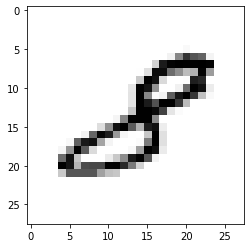

In [10]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    r = random.randint(0, len(mnist_test)-1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r+1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()